# Kieran Molloy UCDPA Project 
### Course CIDAB 2022-01-18
***

### Environment Information
<table align="left">
<tr>
    <th>Environment Type</th>
    <th>Anaconda Version</th>
    <th>Anaconda Build Channel</th>
    <th>Python Version</th>
</tr>
<tr>
    <td>Anaconda </td>
    <td>2021.11 </td>
    <td>py39_0 </td>
    <td>3.9.7 </td>
</tr>
</table>

## Links to Kaggle Datasource: 
***

#### _[Transactional Retail Dataset of Electronics Store](https://www.kaggle.com/datasets/muhammadshahrayar/transactional-retail-dataset-of-electronics-store)_

*  _[dirty_data.csv](https://www.kaggle.com/datasets/muhammadshahrayar/transactional-retail-dataset-of-electronics-store?select=dirty_data.csv)_
*  _[missing_data.csv](https://www.kaggle.com/datasets/muhammadshahrayar/transactional-retail-dataset-of-electronics-store?select=missing_data.csv)_
*  _[warehouses.csv](https://www.kaggle.com/datasets/muhammadshahrayar/transactional-retail-dataset-of-electronics-store?select=warehouses.csv)_


# Setup

## Install Modules

In [2]:
#commented out installers prevent re-run, uncomment if required 
#%pip install geopy
#%pip install plotly

## Import Modules
***

In [3]:
from matplotlib import pyplot as plt
from IPython.display import display 

import pandas as pd
import numpy as np
import seaborn as sns
# import itertools
import time
from datetime import datetime


from geopy.distance import geodesic
from geopy.geocoders import Nominatim
import plotly.express as px 

## Set Variables
***

In [4]:
dirty_data = 'dirty_data.csv'
missing_data = 'missing_data.csv'
warehouses = 'warehouses.csv'
customer_addresses = 'customer_addresses.csv' 

## Functions
***

In [5]:
def get_missing_nearest_warehouse(lat , Long ):
    ''' use coordinates to find the closest warehouse (crow flies) using geodesic API'''
    
    # customer coordinates are provided
    coords_customer = lat, Long
    
    # get warehouse latitude and longitide from warehouse table
    coords_Nickolson = df_warehouses['lat'].loc[df_warehouses.index[0]], df_warehouses['lon'].loc[df_warehouses.index[0]]
    coords_Thompson = df_warehouses['lat'].loc[df_warehouses.index[1]], df_warehouses['lon'].loc[df_warehouses.index[1]]
    coords_Bakers = df_warehouses['lat'].loc[df_warehouses.index[2]], df_warehouses['lon'].loc[df_warehouses.index[2]]
    
    # use geodesic to do a km distance comparison
    Nickolson_cust_dist = geodesic(coords_customer, coords_Nickolson).km
    Thompson_cust_dist = geodesic(coords_customer, coords_Thompson).km
    Bakers_cust_dist = geodesic(coords_customer, coords_Bakers).km
    
    val = (Nickolson_cust_dist ,Thompson_cust_dist ,Bakers_cust_dist)
    
    # get the min value distance value
    min_dist = val.index(min(val))
    
     # convert min_dist to warehouse name and distance in km
    if min_dist == 0:
        warehouse = 'Nickolson'
        distance = Nickolson_cust_dist
        return(warehouse , distance)
    elif min_dist == 1:
        warehouse = 'Thompson'
        distance = Nickolson_cust_dist
        return(warehouse , distance)
    else: 
        warehouse = 'Bakers'
        distance = Nickolson_cust_dist
        return(str(warehouse) , distance)
        # test values : get_missing_nearest_warehouse(-37.815105 ,144.932843)

In [6]:
def get_missing_order_price(order_total, delivery_charges, coupon_discount):
    ''' calculate order_price from order_total, delivery_charges and coupon_discount '''
    order_price = (order_total - delivery_charges) / (100-coupon_discount) * 100
    return(round(order_price, 2))
    # test : get_missing_order_price(11059.89 ,79.89 ,10 )

In [7]:
def get_missing_order_total(order_price, delivery_charges, coupon_discount):
    ''' calculate order_total from order_price, delivery_charges and coupon_discount'''
    order_total = order_price - (order_price / 100 * coupon_discount) + delivery_charges
    return(round(order_total, 2))
    # test values : get_missing_order_total(11059.89 ,79.89 ,10 )

In [8]:
def get_missing_season(date):
    '''calculate season from date'''
    # Spring = months 9,10,11
    # summer = months 12,1,2
    # Autumn = months 3,4,5
    # Winter = months 6,7,8

    month = date.month

    if month in [9,10,11]:
        season = 'Spring'
    elif month in [12,1,2]:
        season = 'Summer'
    elif month in [3,4,5]:
        season = 'Autumn'
    else:
        season = 'Winter'
    
    return(season)
    # test values : get_missing_season(datetime(2019, 6, 22))

In [9]:
def get_geo_address(customer_id, lat, long):
    '''use  Nominatim API to get address data from customer_lat and customer_long'''
    
    # simple multiply by -1   
    geolocator = Nominatim(user_agent="app")
    
    # simple multiply by -1   
    coordinates =  str(lat) + " " + str(long)

    # select the required address 
    location = geolocator.reverse(coordinates,timeout=None)
    address = location.raw['address']
    road = address.get('road', '')
    suburb = address.get('suburb', '')
    city = address.get('city', '')
    postcode = address.get('postcode', '')
    state = address.get('state', '')
    country = address.get('country', '')
    
    return(customer_id, road, suburb, city, postcode, state, country)
    # test values : get_geo_address('ID6231506320' ,-37.8117454 ,144.9564037)

In [10]:
def convert_to_negative(val):
    '''get the negative of a passed value'''
    
    # simple multiply by -1     
    negative_val = val * (-1)
    
    return negative_val
    # test values : convert_to_negative(37.8117454)

# CSV Import and review 
***

<div class="alert alert-block alert-info"><b></b><strong>df_dirty_data</strong> and <strong>df_missing_data</strong> are imported , datatype changes are made on import where possible</div>

In [11]:
# read the CSV from the local Jupyter Notebook directory 
# parsing dates on import since dates were objects also change datatype on order_price
df_dirty_data = pd.read_csv(dirty_data, parse_dates=['date'], dtype={'order_price': 'float'}) 
df_missing_data = pd.read_csv(missing_data, parse_dates=['date']) 
df_warehouses = pd.read_csv(warehouses)
df_customer_addresses = pd.read_csv(customer_addresses) #this csv is created in Section 7

## Data Review
***

### df_dirty_data dataframe review

In [ ]:
type(df_dirty_data)

In [ ]:
print(df_dirty_data.columns)

In [ ]:
# will use display command for better tabular formatting in jupyter Notebook
display(df_dirty_data.head(10))

In [ ]:
# will use display command for better tabular formatting in jupyter Notebook
display(df_dirty_data.describe())

In [ ]:
print(df_dirty_data.info())

In [ ]:
print(df_dirty_data.shape)

In [ ]:
print(df_dirty_data.isna().any())

In [ ]:
print(df_dirty_data.isna().sum())

### df_missing_data dataframe review

In [ ]:
type(df_missing_data)

In [ ]:
print(df_missing_data.columns)

In [ ]:
display(df_missing_data.head(10))

In [ ]:
display(df_missing_data.describe())

In [ ]:
print(df_missing_data.info())

In [ ]:
print(df_missing_data.shape)

In [ ]:
print(df_missing_data.isna().any())

In [ ]:
print(df_missing_data.isna().sum())

### df_warehouses dataframe review

In [ ]:
type(df_warehouses)

In [ ]:
print(df_warehouses.columns)

In [ ]:
type(df_warehouses)

In [ ]:
display(df_warehouses.head())

In [ ]:
display(df_warehouses.describe())

In [ ]:
print(df_warehouses.info())

In [ ]:
print(df_warehouses.shape)

In [ ]:
print(df_warehouses.isna().any())

In [ ]:
print(df_warehouses.isna().sum())

### df_customer_addresses dataframe review

[This DataFrame is created in Section 7](#df_customer_addresses)

In [ ]:
type(df_customer_addresses)

In [ ]:
print(df_customer_addresses.columns)

In [ ]:
type(df_customer_addresses)

In [ ]:
display(df_customer_addresses.head())

In [ ]:
display(df_customer_addresses.describe())

In [ ]:
print(df_customer_addresses.info())

In [ ]:
print(df_customer_addresses.shape)

In [ ]:
print(df_customer_addresses.isna().any())

In [ ]:
print(df_customer_addresses.isna().sum())

## Create Indexes

In [ ]:
# check for orderid uniqueness in df_dirty_data
duplicate_dirty_data = df_dirty_data[df_dirty_data.duplicated(['order_id'])]
print(duplicate_dirty_data)

In [ ]:
# check for orderid uniqueness in df_missing_data 
duplicate_missing_data = df_missing_data[df_missing_data.duplicated(['order_id'])]
print(duplicate_missing_data)

In [ ]:
# create an order_id index on df_dirty_data
df_dirty_data.set_index('order_id',inplace=True)

In [ ]:
# create an order_id index on df_missing_data
df_missing_data.set_index('order_id',inplace=True)

In [ ]:
print(df_dirty_data.index)

In [ ]:
print(df_missing_data.index)

# Detect and fix errors in df_dirty_data DataFrame
***

<div class="alert alert-block alert-info"><b></b>Work is done here to fix anomolous data issues with <strong>df_dirty_data</strong> DataFrame</div>

In [ ]:
# show missing values - none found
print(df_dirty_data.isna().sum())

In [ ]:
print(df_dirty_data.info())

In [ ]:
display(df_dirty_data.head())

In [ ]:
columns = df_dirty_data.columns
print(len(columns))

### Rename 'nearest_warehouse' values

In [ ]:
# getting the unique values for 'nearest_warehouse'
nearest_warehouse = df_dirty_data['nearest_warehouse'].sort_values().unique()
print(nearest_warehouse)

In [ ]:
df_dirty_data['nearest_warehouse'] = df_dirty_data['nearest_warehouse'].str.title()

### Rename 'season' values

In [ ]:
# getting the unique values for 'season'
season = df_dirty_data['season'].sort_values().unique()
print(season)

In [ ]:
df_dirty_data['season'] = df_dirty_data['season'].str.title()

### Check 'order_price' and 'order_total' some values dont seem correct

In [107]:
arr = df_dirty_data['order_price']

print("Q2 quantile of order_price : ", np.quantile(arr, .50))
print("Q1 quantile of order_price : ", np.quantile(arr, .25))
print("Q3 quantile of order_price : ", np.quantile(arr, .75))
print("100th quantile of order_price : ", np.quantile(arr, .1))

Q2 quantile of order_price :  12807.5
Q1 quantile of order_price :  7050.0
Q3 quantile of order_price :  20360.0
100th quantile of order_price :  4002.000000000002


In [108]:
arr = df_dirty_data['order_total']

print("Q2 quantile of order_total : ", np.quantile(arr, .50))
print("Q1 quantile of order_total : ", np.quantile(arr, .25))
print("Q3 quantile of order_total : ", np.quantile(arr, .75))
print("100th quantile of order_total : ", np.quantile(arr, .1))

Q2 quantile of order_total :  11293.96
Q1 quantile of order_total :  6454.735
Q3 quantile of order_total :  18119.1875
100th quantile of order_total :  3747.313000000001


#### visually comparing 'shopping_cart'  'order_price'  'delivery_charges'  'coupon_discount'  'order_total' 

In [ ]:
# sorted by 'order_total','order_price'
df_dirty_data[['shopping_cart','order_price','delivery_charges','coupon_discount','order_total']].sort_values(ascending = False, by=['order_total','order_price']).head(10)

In [ ]:
# sorted by 'order_price','order_total'
df_dirty_data[['shopping_cart','order_price','delivery_charges','coupon_discount','order_total']].sort_values(ascending = False, by=['order_price','order_total']).head(10)

In [ ]:
# sorted by 'order_price','shopping_cart' perhaps anomolies are from items purchased 
df_dirty_data[['shopping_cart','order_price','delivery_charges','coupon_discount','order_total']].sort_values(ascending = False, by=['order_price','shopping_cart']).head(10)

In [ ]:
pd.set_option('display.max_colwidth', 100)
df_dirty_data[['shopping_cart','order_price','delivery_charges','coupon_discount','order_total']].sort_values(ascending = True, by=['order_price']).head(40)

In [ ]:
pd.set_option('max_colwidth', 100)
df_shopping_cart = df_dirty_data[['shopping_cart','order_price']]

# df_shopping_cart_filter = df_shopping_cart[lambda row : row['shopping_cart'].str.contains('Thunder line.*Lucent 330S' ,regex=True)]
df_shopping_cart_filter = df_shopping_cart[lambda row : row['shopping_cart'].str.contains('Thunder line.*Lucent 330S|Lucent 330S.*Thunder line' ,regex=True)].head(40)

df_shopping_cart_filter.sort_values('shopping_cart')
# 'Thunder line' ,'Lucent 330S' ,'Alcon 10', 'Universe Note', 'Olivia x460', 'Candle Inferno', 'iAssist Line', 'iStream', 'Toshika 750', 'pearTV'

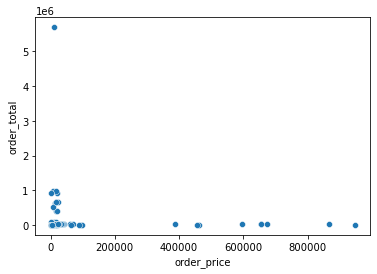

In [146]:
# if we look at order_price versus order_total 
sns.scatterplot(data=df_dirty_data,y='order_total', x='order_price');

In [109]:
# Minimum and maximum order_price versus order_total 
print('Minimum order_price ' + str(df_dirty_data['order_price'].min()));
print('Minimum order_total ' + str(df_dirty_data['order_total'].min()));
print('Maximum order_price ' + str(df_dirty_data['order_price'].max()));
print('Maximum order_total ' + str(df_dirty_data['order_total'].max()));

Minimum order_price 585.0
Minimum order_total 639.29
Maximum order_price 947691.0
Maximum order_total 5688269.6


#### calculating the actual order_total that dont add up from 'order_price' 'delivery_charges' 'coupon_discount' , listing those order_ids 

In [133]:
# lets find where (order_price - coupon_discount + delivery_charges != order_total) dont add up 
# we can use function get_missing_order_total to get order_id where they dont match 
# add to new dataframe df_incorrect_order_total

df_incorrect_order_total = pd.DataFrame()

for i, row in df_dirty_data.iterrows():
    if df_dirty_data.at[i,'order_total'] != get_missing_order_total(df_dirty_data.at[i,'order_price'],df_dirty_data.at[i,'delivery_charges'],df_dirty_data.at[i,'coupon_discount']):
        df_incorrect_order_total = df_incorrect_order_total.append({'customer_id':i,
                'order_id':df_dirty_data.at[i,'order_id'],      
                'order_price':df_dirty_data.at[i,'order_price'],                                 
                'delivery_charges':df_dirty_data.at[i,'delivery_charges'],
                'coupon_discount':df_dirty_data.at[i,'coupon_discount'], 
                'order_total':df_dirty_data.at[i,'order_total']
               },ignore_index=True)

In [150]:
display(df_incorrect_order_total.sort_values('order_total', ascending=False))

,customer_id,order_id,order_price,delivery_charges,coupon_discount,order_total
21,305.0,ORD039111,10820.0,64.03,0.0,5688269.60
15,267.0,ORD139508,16150.0,62.70,5.0,969651.79
10,204.0,ORD451441,8790.0,85.53,5.0,967408.88
1,12.0,ORD124395,19010.0,94.75,0.0,926057.25
31,385.0,ORD015029,2455.0,77.02,5.0,909463.94
34,426.0,ORD057375,18460.0,93.52,25.0,665085.66
14,261.0,ORD244594,22130.0,108.92,25.0,649193.76
12,238.0,ORD450897,17530.0,79.05,0.0,648477.60
3,41.0,ORD481832,14070.0,73.33,15.0,620502.30
17,277.0,ORD131352,7760.0,76.34,5.0,507327.39


#### calculating the actual order_price that dont add up from 'order_total' 'delivery_charges' 'coupon_discount' , listing those order_ids

In [135]:
# lets find where (order_total - delivery_charges / coupon_discount != order_price) dont add up
# we can use function get_missing_order_price to get order_id where they dont match
# add to new dataframe df_incorrect_order_price

df_incorrect_order_price = pd.DataFrame()

for i, row in df_dirty_data.iterrows():
    if df_dirty_data.at[i,'order_price'] != get_missing_order_price(df_dirty_data.at[i,'order_total'],df_dirty_data.at[i,'delivery_charges'],df_dirty_data.at[i,'coupon_discount']):
        df_incorrect_order_price = df_incorrect_order_price.append({'customer_id':i,
                'order_id':df_dirty_data.at[i,'order_id'],                                                  
                'order_price':df_dirty_data.at[i,'order_price'],                                 
                'delivery_charges':df_dirty_data.at[i,'delivery_charges'],
                'coupon_discount':df_dirty_data.at[i,'coupon_discount'], 
                'order_total':df_dirty_data.at[i,'order_total']
               },ignore_index=True)


In [ ]:
df_incorrect_order_price.sort_values('order_total', ascending=False)

In [148]:
# we can conclude that 40 orders have incorrect calculations for either order_price or order_total, 
# the next step woud be to calculate the per item cost in 'shopping_cart' to see where the discrepancies,but i believe it would be out of scope for this assignment
df_incorrect_order_id = df_incorrect_order_price['order_id'] = df_incorrect_order_total['order_id']
print(df_incorrect_order_id.count())

40


In [147]:
# order_id's that are incorrect
print(df_incorrect_order_id)

0     ORD072312
1     ORD124395
2     ORD383725
3     ORD481832
4     ORD386513
5     ORD158007
6     ORD122655
7     ORD016018
8     ORD059126
9     ORD127141
10    ORD451441
11    ORD420200
12    ORD450897
13    ORD113085
14    ORD244594
15    ORD139508
16    ORD063814
17    ORD131352
18    ORD339649
19    ORD253502
20    ORD379975
21    ORD039111
22    ORD346356
23    ORD165713
24    ORD028403
25    ORD496181
26    ORD116440
27    ORD381638
28    ORD349135
29    ORD130025
30    ORD428011
31    ORD015029
32    ORD057456
33    ORD216875
34    ORD057375
35    ORD317652
36    ORD249776
37    ORD453668
38    ORD449772
39    ORD475510
Name: order_id, dtype: object


### Check Latitude and Longitude, some values seem incorrect , some latitude values are negative some are not

#### Check Latitude and Longitude in df_dirty_data

In [ ]:
max_long = df_dirty_data['customer_long'].max();
min_long = df_dirty_data['customer_long'].min()
max_lat = df_dirty_data['customer_lat'].max();
min_lat = df_dirty_data['customer_lat'].min()
print('max_longitude:',max_long)
print('max_latitude:',max_lat)
print('min_longitude:',min_long)
print('min_latitude:',min_lat)

In [ ]:
#  using a scatterplot to visualise discrepancies in Latitude and Longitude in the df_dirty_data DataFrame
#  the scatterplot shows there are some positive latitude values , we'll map these to see where they are
sns.scatterplot(x='customer_lat', y='customer_long' ,data=df_dirty_data)
plt.title('Customer Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.ylim(144, 145)
# plt.xlim(None, None)
height = 20
plt.show()

In [ ]:
# map shows coordinates are in the Melbourne area and off the Japanese coast
# zoom on the map for closer inspection
fig = px.scatter_mapbox(df_dirty_data, lat="customer_lat", lon="customer_long",color_discrete_sequence=["DarkRed"], zoom=2, height=600, center=dict(lat=-4, lon=160), size='customer_long')
fig.update_layout(mapbox_style='open-street-map',margin={'r':500,'t':0,'l':0,'b':0})
fig.show()

In [ ]:
# df_dirty_data.describe shows the max value
display(df_dirty_data.describe()[['customer_lat']])
# min and percentiles are in the -37 decimal range with the exception of the max 37, I suggest these latitudes should be negative, will change and observe the difference 
# if making the values negative re-positions to Melbourne it is probably ok

In [ ]:
# list all rows where 'customer_lat' is positive
positive_customer_lat_to_update = df_dirty_data[df_dirty_data['customer_lat'] > 0 ]
display(positive_customer_lat_to_update[['customer_lat']])

In [ ]:
# getting index where 'customer_lat' is positive
positive_customer_lat_indexto_update = df_dirty_data[df_dirty_data['customer_lat'] > 0 ].index
print(positive_customer_lat_indexto_update)

In [ ]:
# updating missing values for 'nearest_warehouse'
for i, row in positive_customer_lat_to_update.iterrows():
    df_dirty_data.at[i,'customer_lat'] = convert_to_negative(df_dirty_data.at[i,'customer_lat'])

In [ ]:
# list all rows where 'customer_lat' is positive : all fixed
positive_customer_lat_to_update = df_dirty_data[df_dirty_data['customer_lat'] > 0 ]
positive_customer_lat_to_update

In [ ]:
#check the indexes for the updated 'customer_lat' --  all done
display(df_dirty_data[['customer_lat']].loc[positive_customer_lat_indexto_update])

In [ ]:
#  using a scatterplot to visualise updated in Latitude and Longitude in the df_dirty_data DataFrame
# all values are negative
sns.scatterplot(x='customer_lat', y='customer_long' ,data=df_dirty_data)
plt.title('Customer Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
height = 20
plt.show()

In [ ]:
# check the updated coordinates are in the Melbourne area , all seem to be good, all located downtown Melbourne and north of Melbourne
# zoom on the map for closer inspection
fig = px.scatter_mapbox(df_dirty_data, lat="customer_lat", lon='customer_long',color_discrete_sequence=['DarkRed'],center=dict(lat=-37.5, lon=145), zoom=7)
fig.update_layout(mapbox_style='open-street-map',margin={'r':500,'t':0,'l':0,'b':0})
fig.show()

#### Check Latitude and Longitude in df_missing_data

In [ ]:
max_long = df_missing_data['customer_long'].max();
min_long = df_missing_data['customer_long'].min()
max_lat = df_missing_data['customer_lat'].max();
min_lat = df_missing_data['customer_lat'].min()
print('max_longitude:',max_long)
print('max_latitude:',max_lat)
print('min_longitude:',min_long)
print('min_latitude:',min_lat)

In [ ]:
# here we can see the scatterplot contains an even distribution for negative latitude values in the df_missing_data DataFrame
sns.scatterplot(x='customer_lat', y='customer_long',data=df_missing_data)
plt.title('df_missing_data Latitude and Longitude')
# Set x-axis label
plt.xlabel('Customer Longitude')
# Set y-axis label
plt.ylabel('Customer Latitude')
plt.show()

In [ ]:
# map shows all coordinates are in the Melbourne area in df_missing_data nothing seems out of order
# zoom on the map for closer inspection
fig = px.scatter_mapbox(df_missing_data, lat='customer_lat', lon='customer_long',color_discrete_sequence=['DarkRed'], zoom=11)
fig.update_layout(mapbox_style='open-street-map',margin={'r':500,'t':0,'l':0,'b':0})
fig.show()

# Detect and Fix missing values in df_missing_data DataFrame
***

<div class="alert alert-block alert-info"><b></b>Work is done here to fix missing data issues with <strong>df_missing_data</strong> DataFrame<br><strong>Work was not done to fix missing data in customer_lat, customer_long or is_happy_customer i think these are out of scope</strong></div>

In [ ]:
# show missing values
print(df_missing_data.isna().sum())

### Fix missing 'nearest_warehouse' values

In [ ]:
# getting rows for the missing values for 'nearest_warehouse'
nearest_warehouse_to_update = df_missing_data[df_missing_data['nearest_warehouse'].isna()]

display(nearest_warehouse_to_update[['nearest_warehouse']])

In [ ]:
# getting index for the the missing values for 'nearest_warehouse'
nearest_warehouse_indexto_update = df_missing_data[df_missing_data['nearest_warehouse'].isna()].index
print(nearest_warehouse_indexto_update)

In [ ]:
# updating missing values for 'nearest_warehouse'
for i, row in nearest_warehouse_to_update.iterrows():
    df_missing_data.at[i,'nearest_warehouse'] = get_missing_nearest_warehouse(df_missing_data.at[i,'customer_lat'],df_missing_data.at[i,'customer_long'])[0]

In [ ]:
# no more missing values for 'nearest_warehouse'
print(df_missing_data[df_missing_data['nearest_warehouse'].isna()])

In [ ]:
#check the indexes for the update 'nearest_warehouse' --  all done
display(df_missing_data[['nearest_warehouse']].loc[nearest_warehouse_indexto_update])

### Fix missing 'order_price' values

In [ ]:
# getting rows for the missing values for 'order_price'
order_price_to_update = df_missing_data[df_missing_data['order_price'].isna()]

display(order_price_to_update[['order_price']])

In [ ]:
# getting index for the the missing values for 'order_price'
order_price_indexto_update = df_missing_data[df_missing_data['order_price'].isna()].index
print(order_price_indexto_update)

In [ ]:
# updating missing values for 'order_price'
for i, row in order_price_to_update.iterrows():
    df_missing_data.at[i,'order_price'] = get_missing_order_price(df_missing_data.at[i,'order_total'],df_missing_data.at[i,'delivery_charges'],df_missing_data.at[i,'coupon_discount'])

In [ ]:
# no more missing values for 'order_price'
print(df_missing_data[df_missing_data['order_price'].isna()])

In [ ]:
#check the indexes for the update 'order_price' --  all done
display(df_missing_data[['order_price']].loc[order_price_indexto_update])

### Fix missing 'order_total' values

In [ ]:
# getting rows for the missing values for 'order_total'
order_total_to_update = df_missing_data[df_missing_data['order_total'].isna()]

display(order_total_to_update[['order_total']])

In [ ]:
# getting index for the the missing values for 'order_total'
order_total_indexto_update = df_missing_data[df_missing_data['order_total'].isna()].index
print(order_total_indexto_update)

In [ ]:
# updating missing values for 'order_total'
for i, row in order_total_to_update.iterrows():
    df_missing_data.at[i,'order_total'] = get_missing_order_total(df_missing_data.at[i,'order_price'],df_missing_data.at[i,'delivery_charges'],df_missing_data.at[i,'coupon_discount'])

In [ ]:
# no more missing values for 'order_total'
print(df_missing_data[df_missing_data['order_total'].isna()])

In [ ]:
#check the indexes for the update 'order_total' --  all done
display(df_missing_data[['order_total']].loc[order_total_indexto_update])

### Fix missing 'season' values

In [ ]:
# getting rows for the missing values for 'season'
season_to_update = df_missing_data[df_missing_data['season'].isna()]

display(season_to_update[['season']])

In [ ]:
# getting index for the the missing values for 'order_total'
season_indexto_update = df_missing_data[df_missing_data['season'].isna()].index
print(season_indexto_update)

In [ ]:
# getting the unique values for 'season'
seasons = df_missing_data['season'].sort_values().unique()
print(seasons)

In [ ]:
# get the season months from the grouping of the orders..obviously Southern hemisphere - a random lat long shows its Melbourne, Australia area
season_months = df_missing_data.groupby([pd.Grouper(key='date', axis=0, freq='M'),'season']).sum().filter(items=['date','season'])
(season_months)
# summer = months 12,1,2
# Autumn = months 3,4,5
# Winter = months 6,7,8
# Spring = months 9,10,11

In [ ]:
# updating missing values for 'season'
for i, row in season_to_update.iterrows():
    df_missing_data.at[i,'season'] = get_missing_season(df_missing_data.at[i,'date'])

In [ ]:
# no more missing values for 'season'
print(df_missing_data[df_missing_data['season'].isna()])

In [ ]:
#check the indexes for the update 'season' --  all done
display(df_missing_data[['season']].loc[order_total_indexto_update])

### Fix missing 'distance_to_nearest_warehouse' values

In [ ]:
# getting rows for the missing values for 'distance_to_nearest_warehouse'
distance_to_nearest_warehouse_to_update = df_missing_data[df_missing_data['distance_to_nearest_warehouse'].isna()]

display(distance_to_nearest_warehouse_to_update[['distance_to_nearest_warehouse']])

In [ ]:
# getting index for the the missing values for 'distance_to_nearest_warehouse'
distance_to_nearest_warehouse_indexto_update = df_missing_data[df_missing_data['distance_to_nearest_warehouse'].isna()].index
print(distance_to_nearest_warehouse_indexto_update)

In [ ]:
# updating  missing values for 'nearest_warehouse'
# for i in distance_to_nearest_warehouse_indexto_update:
# df_missing_data.at[i,'distance_to_nearest_warehouse'] = get_missing_nearest_warehouse(df_missing_data.at[i,'customer_lat'],df_missing_data.at[i,'customer_long'])[1]

# updating missing values for 'distance_to_nearest_warehouse'
for i, row in distance_to_nearest_warehouse_to_update.iterrows():
    df_missing_data.at[i,'distance_to_nearest_warehouse'] = get_missing_nearest_warehouse(df_missing_data.at[i,'customer_lat'],df_missing_data.at[i,'customer_long'])[1]

In [ ]:
# no more missing values for 'distance_to_nearest_warehouse'
print(df_missing_data[df_missing_data['distance_to_nearest_warehouse'].isna()])

In [ ]:
#check the indexes for the update 'season' --  all done
display(df_missing_data[['distance_to_nearest_warehouse']].loc[order_total_indexto_update])

### Fix missing 'customer_lat' values - not progressing with this: out of scope for this assignment

In [ ]:
# show missing 'customer_lat' rows
customer_lat_to_update = df_missing_data[df_missing_data['customer_lat'].isna()]
display(customer_lat_to_update[['customer_lat']])

In [ ]:
# getting the index for the missing values for customer_lat
customer_lat_indexto_update = df_missing_data[df_missing_data['customer_lat'].isna()].index
customer_lat_indexto_update

### Fix missing 'customer_long' values - not progressing with this: out of scope for this assignment

In [ ]:
# show missing 'customer_long' rows
customer_lat_to_update = df_missing_data[df_missing_data['customer_long'].isna()]
display(customer_lat_to_update[['customer_long']])

In [ ]:
# getting the index for the missing values for customer_long
customer_long_indexto_update = df_missing_data[df_missing_data['customer_long'].isna()].index
customer_long_indexto_update

In [ ]:
# show missing values
print(df_missing_data.isna().sum())

### Fix missing 'is_happy_customer' values - not progressing with this: out of scope for this assignment

* would need sentiment analysis against the latest_customer_review column

# Merge/Append Dataframes
***

<div class="alert alert-block alert-info"><b></b>Work is complete on correcting issues with <strong>df_missing_data</strong> and <strong>df_dirty_data</strong> they are appended here to create <strong>df_order_data</strong><br> NaN are filtered from 'customer_lat', 'customer_long' and 'is_happy_customer' </div>

In [ ]:
df_missing_data.shape

In [ ]:
df_dirty_data.shape

In [ ]:
# remove NaN for 'customer_lat', 'customer_long' and 'is_happy_customer' from df_missing_data
df_missing_data_NoNa = df_missing_data[(df_missing_data['customer_lat'].isna()) & (df_missing_data['customer_long'].isna()) & (df_missing_data['is_happy_customer'].isna())]
df_missing_data_NoNa.shape

In [ ]:
# remove NaN for 'customer_lat', 'customer_long' and 'is_happy_customer' from  df_dirty_data
df_dirty_data_NoNa = df_dirty_data[(df_dirty_data['customer_lat'].isna()) & (df_dirty_data['customer_long'].isna()) & (df_dirty_data['is_happy_customer'].isna())]
df_dirty_data_NoNa.shape

In [ ]:
# create a new dataframe from df_dirty_data_NoNa and df_missing_data_NoNa 
df_order_data = df_dirty_data_NoNa.append(df_missing_data_NoNa,ignore_index = False)
df_order_data.shape

<a id="df_customer_addresses"></a>

# Create new df_customer_addresses DataFrame
***

<div class="alert alert-block alert-info"><b></b><strong>df_customer_addresses</strong> is created here from <strong>df_order_data</strong>.<br><strong>df_customer_addresses</strong> contains addresses for customers by making an Nominatum API call using the <strong>get_geo_address</strong> function<br><strong>df_customer_addresses</strong> is exported to <strong>customer_addresses.csv</strong> for re-use</div>

In [ ]:
# getting 'customer_lat' and 'customer_long'] for df_order_data
customerid_lat_long = df_order_data[['customer_id','customer_lat','customer_long']]

display(customerid_lat_long.head(10))

In [ ]:
# get address for each customer and create a new Dataframe called df_customer_addresses
# create_df_customer_addresses = 0 so it doesnt run if 'All Cells are Run'
# Change create_df_customer_addresses = 1 to create the df_customer_addresses Dataframe , estimated time 970 records @ 1 second each ~ 17mins.. more like 30mins

create_df_customer_addresses = 0

if create_df_customer_addresses == 1:
    print('Creating df_customer_addresses Dataframe')
    df_customer_addresses = pd.DataFrame()
    x=1
    for i, row in customerid_lat_long.iterrows():
            #print to screen to get completion estimate from x     
            print(x,row[0],row[1],row[2])
            x+=1
            #add 1 second delay from Nominatum rate limiting         
            time.sleep(1)
            # pass values to the get_geo_address function          
            df_customer_addresses = df_customer_addresses.append({'customer_id':get_geo_address(row[0],row[1],row[2])[0], 
                        'road':get_geo_address(row[0],row[1],row[2])[1],
                        'suburb':get_geo_address(row[0],row[1],row[2])[2],
                        'city':get_geo_address(row[0],row[1],row[2])[3],
                        'postcode':get_geo_address(row[0],row[1],row[2])[4],                                 
                        'state':get_geo_address(row[0],row[1],row[2])[5], 
                        'country':get_geo_address(row[0],row[1],row[2])[6]
                       },ignore_index=True)
else:
    print('Dataframe df_customer_addresses not required')


In [ ]:
# output df_customer_addresses created in previous step to csv in local notebook path
df_customer_addresses.to_csv(r'customer_addresses.csv')

In [ ]:
display(df_customer_addresses)

## Analyse
***

In [ ]:
print(df_missing_data.columns)

## Visualise
***